In [113]:
#IMPORT required modules
import pandas as pd
import numpy as np
from datetime import datetime
import holidays
from matplotlib import pyplot as plt

In [103]:
elec_csmp = pd.read_csv('train.csv',sep=',')
elec_csmp['datetime'] = pd.to_datetime(elec_csmp['datetime'])

In [104]:
elec_csmp = elec_csmp.drop(columns=['var1','var2'])

In [105]:
s = {1:4,2:4,3:1,4:1,5:1,6:2,7:2,8:2,9:3,10:3,11:3,12:4}
season = pd.Series([s[i.month] for i in elec_csmp['datetime']])
elec_csmp['season'] = season

In [106]:
us_holidays = holidays.UnitedStates()
hldy = pd.Series([ 1 if (i in us_holidays) or (i.isoweekday()>5) else 0 for i in elec_csmp['datetime'] ])
elec_csmp['holiday'] = hldy

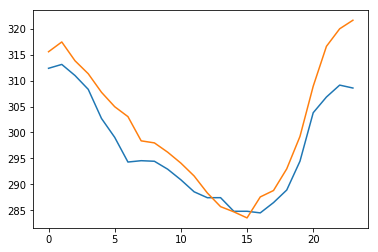

In [133]:
temp = pd.Series([i.hour for i in elec_csmp['datetime']])
elec_csmp['temp'] = temp
#plt.plot([i for i in range(0,24)],elec_csmp.groupby(['temp']).mean()['electricity_consumption'] )
j=0
xh = []
xno = []
for i in elec_csmp.groupby(['temp','holiday']).mean()['electricity_consumption']:
    if(j%2==0):
        xh.append(i)
    else:
        xno.append(i)
    j+=1
plt.plot(xh)
plt.plot(xno)

In [107]:
#first 5 tuples of the tables
elec_csmp.head()
#print(elec_csmp['electricity_consumption'].mean())
#print(elec_csmp.groupby(['season']).mean())
#print(elec_csmp.groupby(['holiday']).mean())
#0 missing values
#print(sum(elec_csmp.isnull().values.ravel()))

,ID,datetime,temperature,pressure,windspeed,electricity_consumption,season,holiday
0,0,2013-07-01 00:00:00,-11.4,1003.0,571.910,216.0,2,0
1,1,2013-07-01 01:00:00,-12.1,996.0,575.040,210.0,2,0
2,2,2013-07-01 02:00:00,-12.9,1000.0,578.435,225.0,2,0
3,3,2013-07-01 03:00:00,-11.4,995.0,582.580,216.0,2,0
4,4,2013-07-01 04:00:00,-11.4,1005.0,586.600,222.0,2,0


<b>Training samples : </b><br>
 The original nonnegative data series <i>X0</i> with <i>m</i> samples denotes the electricity consumption, which is expressed as follows:<br>
$$X0 = X0(0),X0(1)...X0(m) $$<br>

<b>1-AGO (one-time accumulating generation operation):</b><br>
$$X1 = X1(0),X1(1)....X1(m)$$ <br>
where
$$x1(k)=\sum_{i=0}^k x0(i)\ , \ k= 1,2,3,4..m$$ 


In [4]:
# X = required column for training
X = elec_csmp['electricity_consumption']
X0 = np.array(X)
X1 = np.cumsum(X0)

The general <b>GM(1,1)</b> is described by the following grey differential equation:<br>
<br>$$x(0)\:+a.z1(k)\:=\:b$$<br>

where a is the grey developmental coefficient and b is the grey control parameter. Thus,
<br>$$z1(k)\:=(1-\alpha).x1(k)\:+\:\alpha . x1(k-1)$$<br>

In [5]:
alpha = 0.5
Z1 = (1-alpha)*X1[1:] + alpha*X1[:-1]
#print((Z1))

In [12]:
#coefficient caclulation
B = np.vstack((-Z1,np.ones(len(Z1)))).T
Y = X0[1:]

#coef =[a,b] = (bt * b)inv * bt * y
coef = np.dot(B.T,B)
coef = np.linalg.inv(coef)
coef = np.dot(coef,B.T)
coef = np.dot(coef,Y)

In [19]:
print(f"a = {coef[0]} b = {coef[1]}")

a = 4.183686479715328e-07 b = 300.01952097917206
